##  Feature Scaling:

we will Use the **D.C. Residential Properties dataset**  (https://www.kaggle.com/christophercorrea/dc-residential-properties) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "datasets/DC_Properties.csv"

prop_df = pd.read_csv(filepath)
prop_df.head()

C:\Users\tahan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
prop_df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
prop_df['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

In [5]:
#check if any missing values in the data
prop_df['PRICE'].isnull().sum()

60741

In [6]:
len(prop_df['PRICE'])

158957

In [7]:
prop_df['PRICE'][:5]

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [10]:
prop_df['PRICE'].count()

98216

In [11]:
# fill in missing PRICE with the mean PRICE
PRICE_mean = prop_df['PRICE'].mean()
prop_df['PRICE'].fillna(PRICE_mean, inplace=True)

In [12]:
prop_df['PRICE'].isnull().sum()

0

### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.
### \begin{align}  z = \frac{(value - mean)}{std dev} \end{align}

In [13]:
#first 5 rows of the 'PRICE' column
prop_df['PRICE'].head()

0    1.095000e+06
1    9.313516e+05
2    2.100000e+06
3    1.602000e+06
4    9.313516e+05
Name: PRICE, dtype: float64

In [14]:
#Method 1: manual calculation of z-scores for 'PRICE' column

#mean for the column
mean = prop_df['PRICE'].mean()

#standard deviation of the column
std = prop_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
PRICE_z_manual = (prop_df['PRICE'] - mean)/std

In [15]:
#values for mean and standard deviation of 'PRICE' column.
mean, std

(931351.5949342768, 5550558.004606821)

In [16]:
PRICE_z_manual.mean() ,PRICE_z_manual.std()

(-1.1215200021867614e-13, 0.9999999999999976)

In [17]:
#first 5 rows of z-score standardized 'PRICE' column
PRICE_z_manual.head()

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [18]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
PRICE_zscore = scaler.fit_transform(prop_df[['PRICE']])

In [19]:
#mean and standard deviation of z-score standardized 'Glucose' column
PRICE_zscore.mean(), PRICE_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [20]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
PRICE_z_col = pd.Series(PRICE_zscore.reshape(-1))

In [21]:
PRICE_z_col.head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

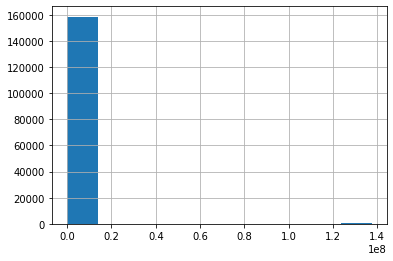

In [22]:
#BEFORE: frequency count plot of 'PRICE' column
prop_df['PRICE'].hist()

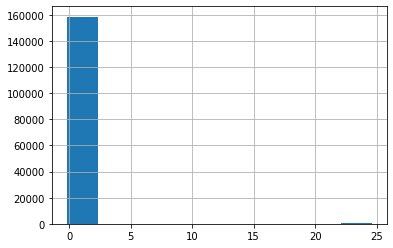

In [23]:
#AFTER: frequency count plot of 'PRICE' column (z-score standardization)
#range is much smaller
PRICE_z_col.hist()

### Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [24]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [25]:
#use MinMaxScaler function and fit_transform function on the 'PRICE' column
PRICE_minmax = minmax_sc.fit_transform(prop_df[['PRICE']])

In [26]:
#min and max of Min-Max 'PRICE' column
PRICE_minmax.min(), PRICE_minmax.max()

(0.0, 0.9999999999999999)

In [27]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
PRICEMM_col = pd.Series(PRICE_minmax.reshape(-1))
PRICEMM_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [28]:
# add z-score 'PRICE' column to prop_df
prop_df['PRICE'] = PRICE_z_col

In [29]:
prop_df['PRICE'].head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
Name: PRICE, dtype: float64

### Tips for Predictive Models

- Z-score standardization is most useful for regression models, such as linear regression and logistic regression
- Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering